In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### PCA - Used to reduce dimensions - Unsupervised learning
<pre>
1) Standardize the dataset.
2) Compute Covaraince Matrix from the Standardized dataset.
3) Compute Eigen values and eigen vectors from the Covaraince Matrix.
Arrange Eigen Vectors in decreasing order of Eigen values.

4) Select Feature matrix which is min number of eigen vectors required to generate the principal components.
5) Generate Principal Components from the Feature matrix.

PCs = np.dot(std_org_dataset,Eig_vect.T)
</pre>

#### Read the dataset

In [259]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [260]:
df.shape

(1460, 81)

#### Data Preprocessing

#### Handle Null Values

In [261]:
def fetch_null_val(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Count':nv.values,
                         '%Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('%Null',ascending=False)
    return nv_df

In [262]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


In [263]:
df1 = df.copy()

In [264]:
cols = ['PoolQC','MiscFeature','Alley','Fence']
for i in cols:
    print(i,df[i].unique())

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [265]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [266]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
1,MasVnrType,872,59.726027
9,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
10,GarageType,81,5.547945
11,GarageYrBlt,81,5.547945
12,GarageFinish,81,5.547945
13,GarageQual,81,5.547945
14,GarageCond,81,5.547945
5,BsmtExposure,38,2.602740
7,BsmtFinType2,38,2.602740


In [267]:
nv_df['Feature'].values

array(['MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'MasVnrArea', 'Electrical'], dtype=object)

#### Basement related Features

In [268]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    print(i,df[i].unique())

BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [269]:
cols = ['BsmtExposure','BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in cols:
    df[i] = df[i].fillna('No Basement')

#### Garege Related Faetures

In [270]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']  #  'GarageYrBlt'
for i in cols:
    print(i,df[i].unique())

GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [271]:
cols = ['GarageType','GarageFinish', 'GarageQual', 'GarageCond']
for i in cols:
    df[i] = df[i].fillna('No Garage')

In [272]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    print(df[i].value_counts())

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64


In [273]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [274]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,MasVnrType,872,59.726027
2,FireplaceQu,690,47.260274
3,GarageYrBlt,81,5.547945
1,Electrical,1,0.068493


In [275]:
df['MasVnrType'].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [276]:
df['GarageYrBlt'].nunique()

97

In [277]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

# df['GarageYrBlt'].mode()[0] or df['GarageYrBlt'].mode().max()

In [278]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [279]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [280]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,MasVnrType,872,59.726027
1,Electrical,1,0.068493


In [281]:
df['MasVnrType'] = df['MasVnrType'].fillna('Other')

In [282]:
df.shape

(1460, 77)

In [283]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null
0,Electrical,1,0.068493


In [284]:
df.dropna(inplace=True)

In [285]:
df.shape

(1459, 77)

In [286]:
nv_df = fetch_null_val(df)
nv_df

,Feature,Null_Count,%Null


#### Duplicates

In [287]:
df.duplicated().sum()

0

In [288]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

In [289]:
df.drop('Id',axis=1,inplace=True)

In [290]:
df.shape

(1459, 76)

In [291]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

### EDA

In [292]:
cat_cols = df.dtypes[df.dtypes=='object'].index 
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)
print(cat_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Ce

In [293]:
len(cat_cols)

39

#### Univariate - CountPlot

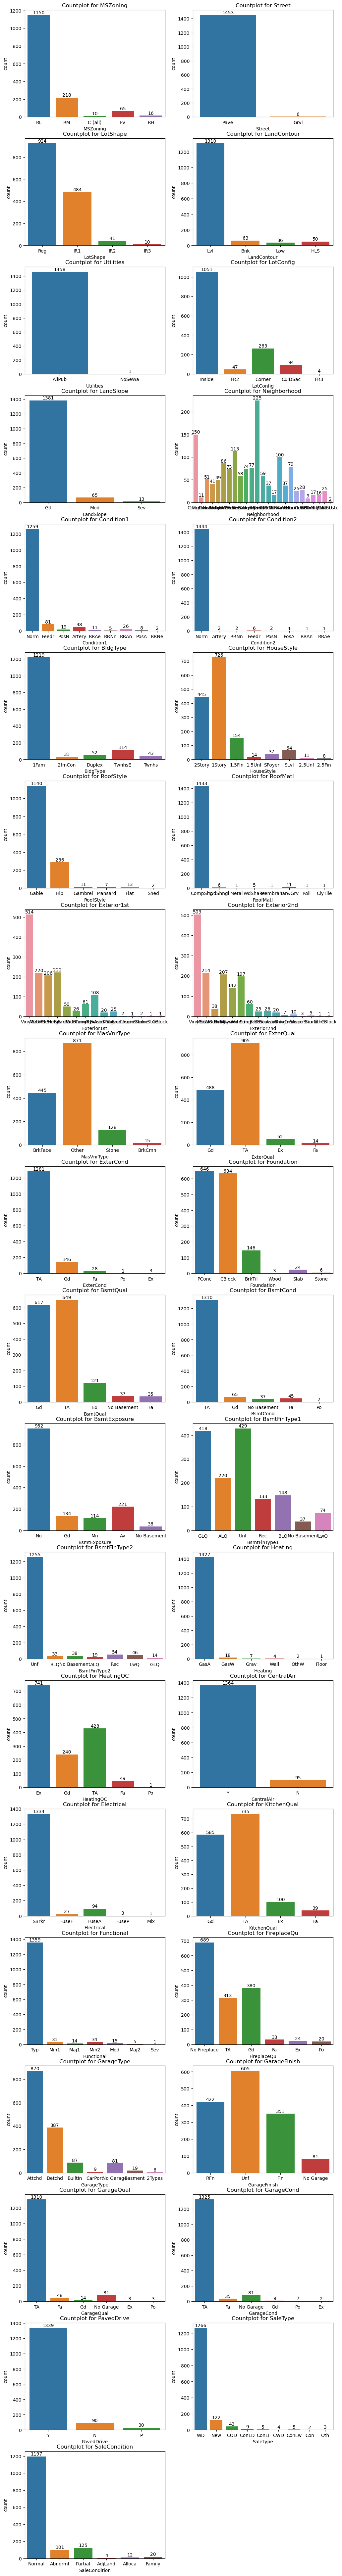

In [294]:
plt.figure(figsize=(12,100))
for i in range(len(cat_cols)):
    plt.subplot(20,2,i+1)
    ax = sns.countplot(x=df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

In [295]:
cols_to_drop =['Street','Utilities','LandSlope','Condition2',
                'RoofMatl','Heating','Functional']

In [296]:
df.drop(cols_to_drop,axis=1,inplace=True)
df.shape

(1459, 69)

#### Bivariate - Num- num

In [297]:
cols = num_cols[:-1]
print(len(cols))

36


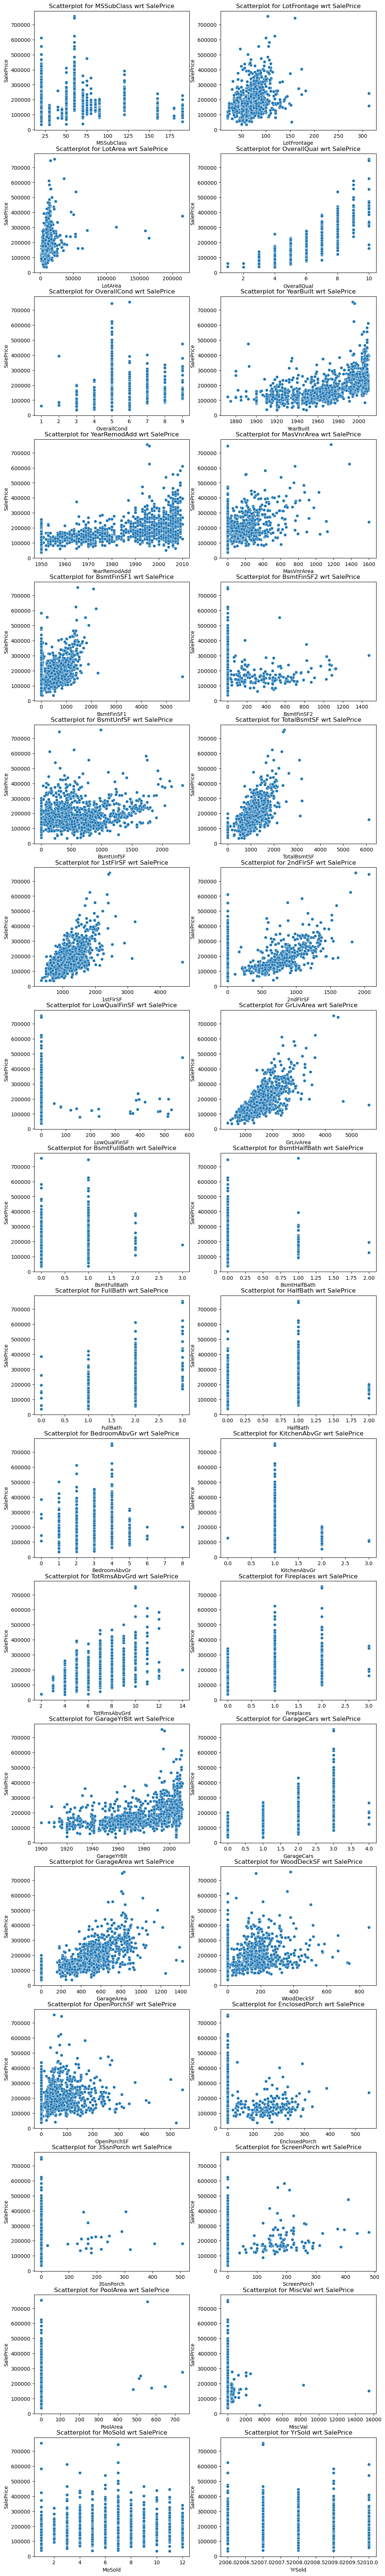

In [298]:
plt.figure(figsize=(12,90))
for i in range(len(cols)):
    plt.subplot(18,2,i+1)
    sns.scatterplot(x=df[cols[i]],y=df['SalePrice'])
    plt.title(f'Scatterplot for {cols[i]} wrt SalePrice')
plt.show()

In [299]:
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [300]:
cols_to_drop_num = ['LowQualFinSF','3SsnPorch','PoolArea','MiscVal']
df.drop(cols_to_drop_num,axis=1,inplace=True)

In [301]:
df.shape

(1459, 65)

In [302]:
cat_cols = df.dtypes[df.dtypes=='object'].index 
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols,len(num_cols))
print(cat_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 33
Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
  

#### Corr

In [303]:
print(sns.__version__)

0.12.2


In [304]:
# !pip install seaborn==0.13.2

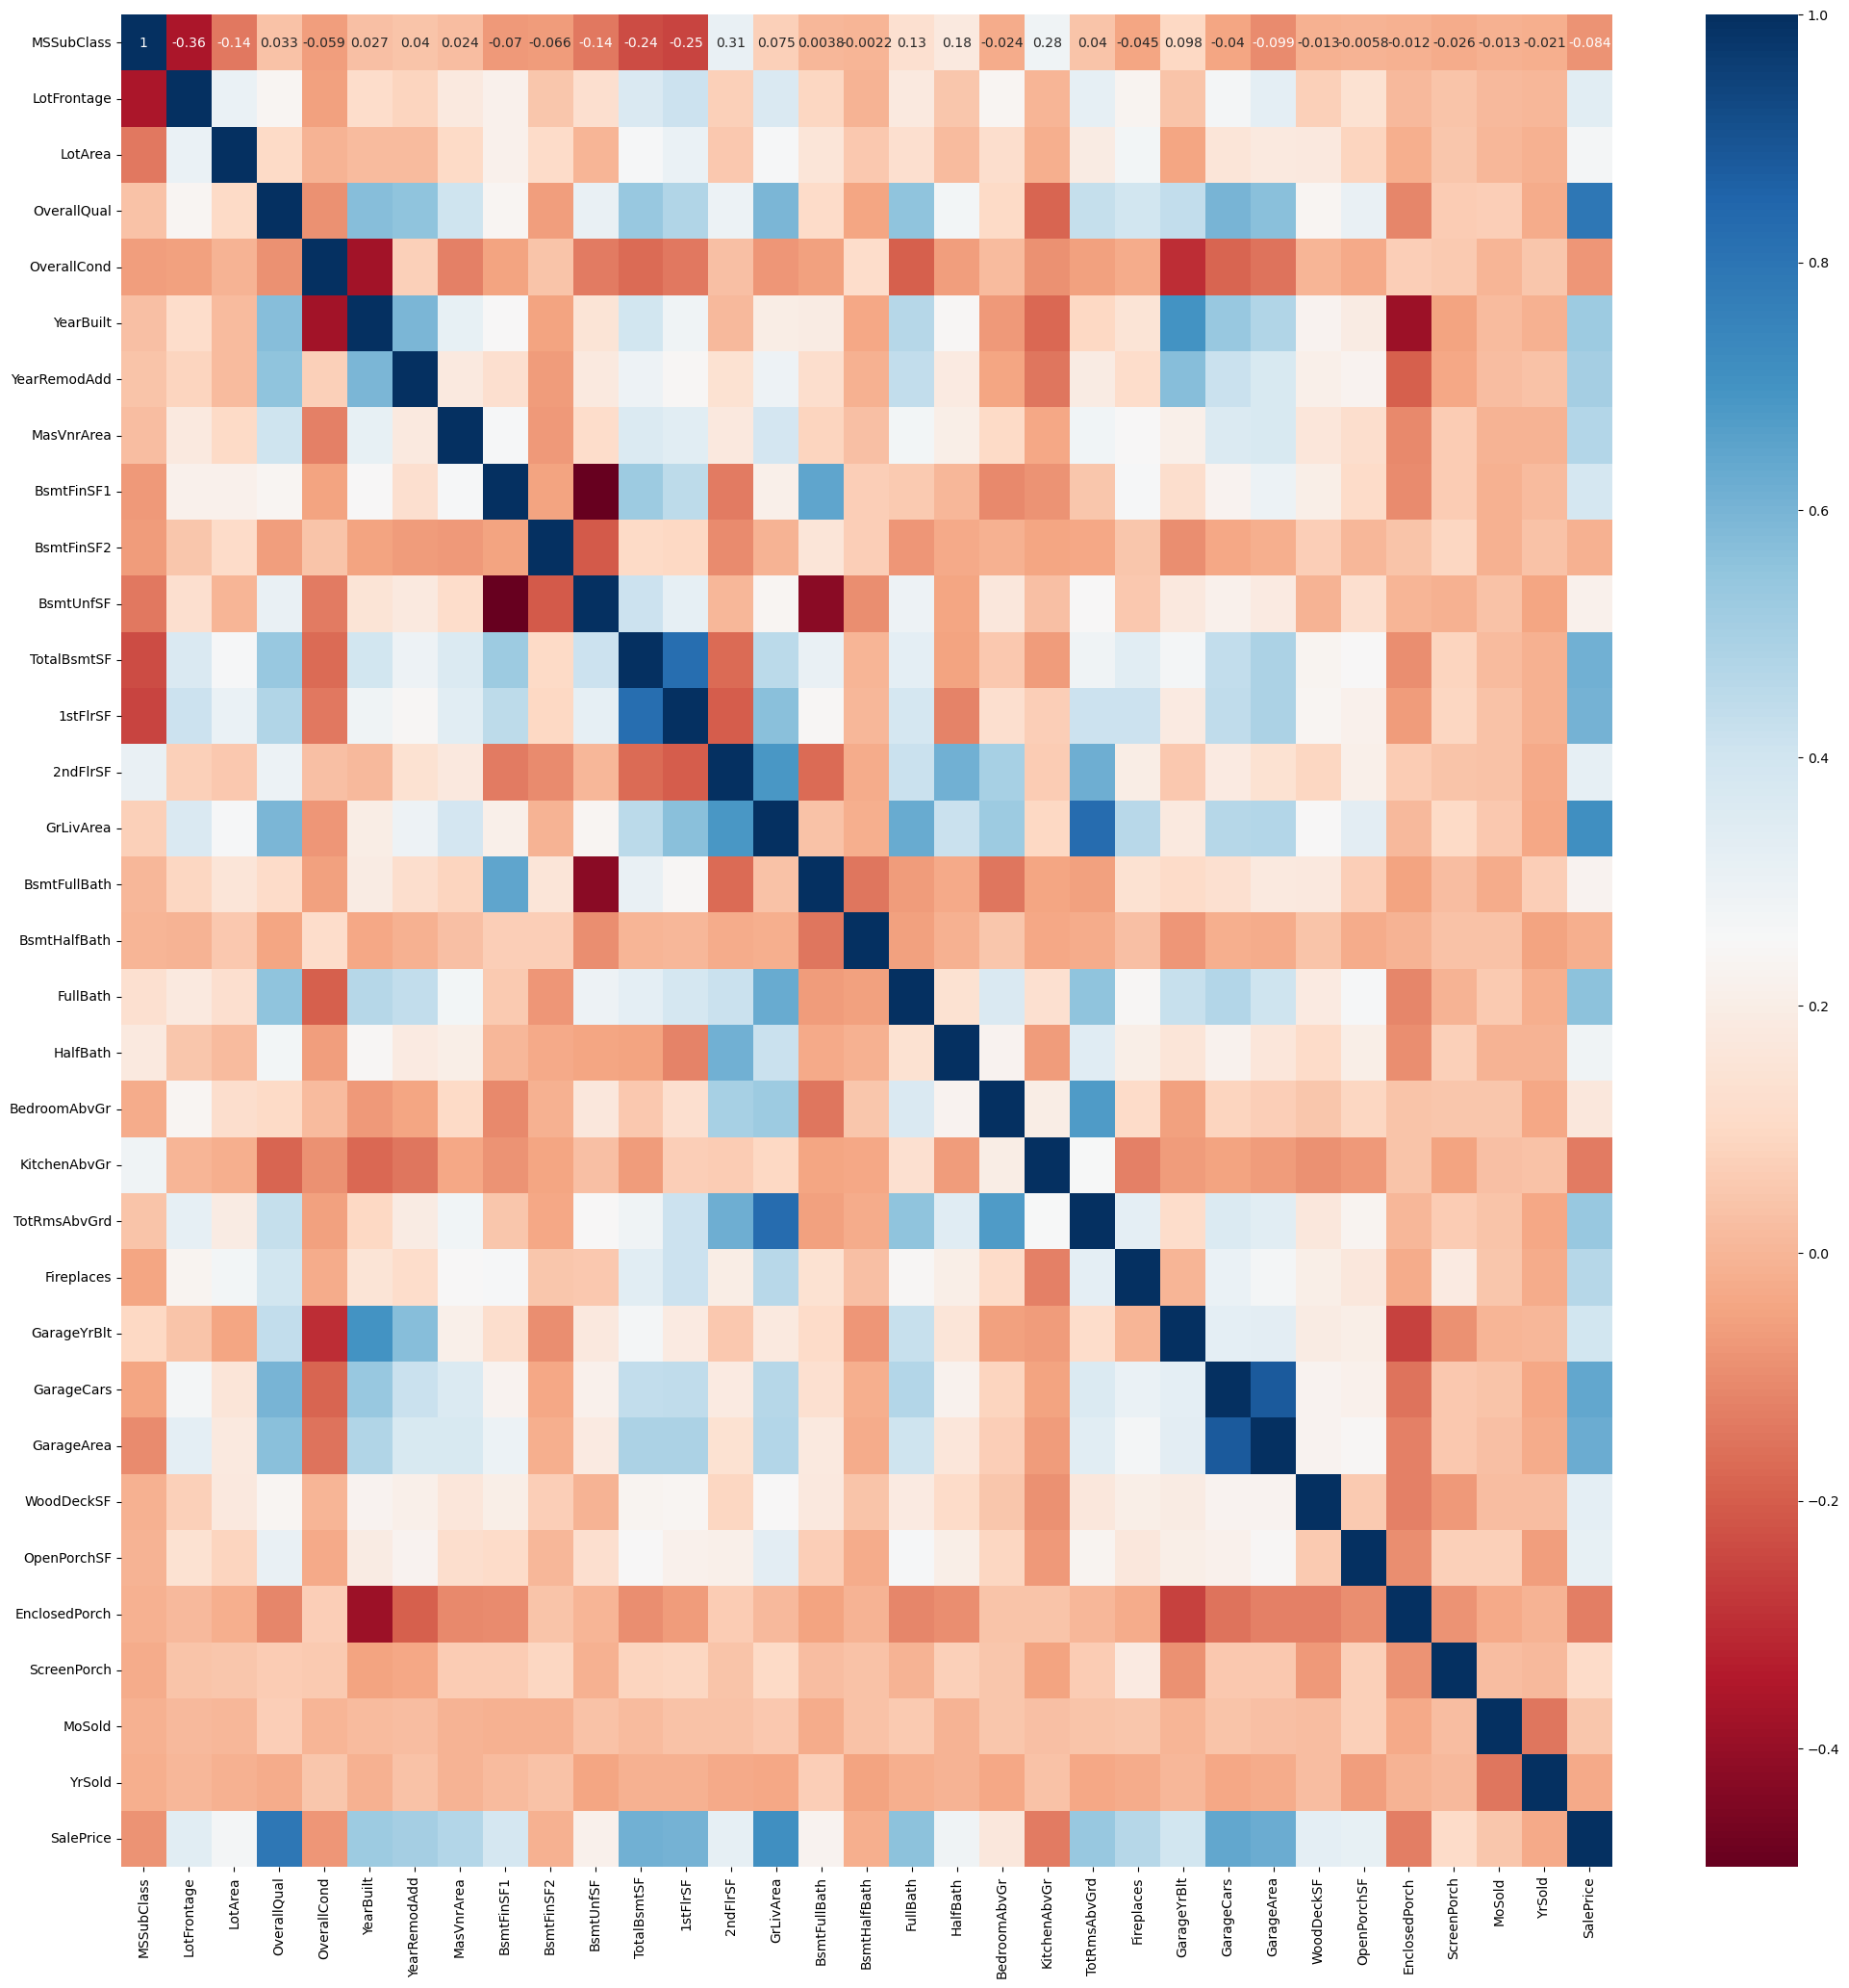

In [305]:
corr = df[num_cols].corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

#### Outlier Treatment

In [306]:
len(num_cols)

33

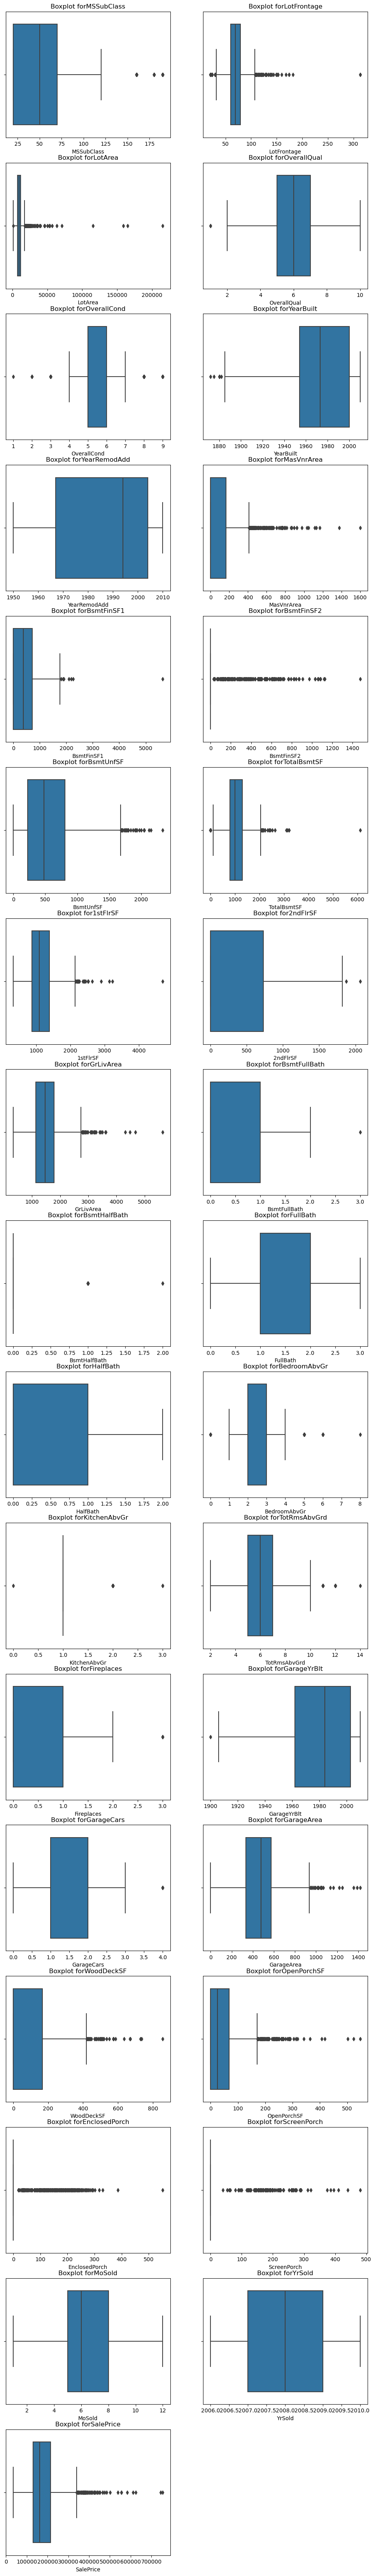

In [307]:
plt.figure(figsize=(12,85))
for i in range(len(num_cols)):
    plt.subplot(17,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for{num_cols[i]}')
plt.show()

In [308]:
print(df.shape)
print(df[df['BsmtFinSF2']==0].shape)
print(df[df['BsmtHalfBath']==0].shape)
print(df[df['EnclosedPorch']==0].shape)
print(df[df['ScreenPorch']==0].shape)

(1459, 65)
(1292, 65)
(1377, 65)
(1251, 65)
(1343, 65)


In [309]:
(1251/1459)*100

85.74366004112406

In [310]:
num_cols_to_drop = ['BsmtFinSF2','BsmtHalfBath',
                    'EnclosedPorch','ScreenPorch']
df.drop(num_cols_to_drop,axis=1,inplace=True)

In [311]:
df.shape

(1459, 61)

In [312]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(len(num_cols))
print(num_cols)

29
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [313]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,
                                        0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
MSSubClass,20.0,20.00,20.00,20.00,20.0,50.0,160.0,160.00,188.40,190.00,190.0
LotFrontage,21.0,21.00,24.00,30.00,35.9,69.0,104.0,114.00,120.84,137.42,313.0
LotArea,1300.0,1680.00,2123.88,2522.00,3307.4,9477.0,17402.3,21576.60,25255.44,37593.68,215245.0
OverallQual,1.0,3.00,4.00,4.00,4.0,6.0,8.0,9.00,9.00,10.00,10.0
OverallCond,1.0,3.00,3.00,4.00,4.0,5.0,8.0,8.00,8.00,9.00,9.0
YearBuilt,1872.0,1899.16,1908.32,1910.00,1916.0,1973.0,2007.0,2007.00,2008.00,2009.00,2010.0
YearRemodAdd,1950.0,1950.00,1950.00,1950.00,1950.0,1994.0,2007.0,2008.00,2008.00,2009.00,2010.0
MasVnrArea,0.0,0.00,0.00,0.00,0.0,0.0,456.0,573.78,650.84,791.36,1600.0
BsmtFinSF1,0.0,0.00,0.00,0.00,0.0,384.0,1274.0,1376.38,1442.68,1572.42,5644.0
BsmtUnfSF,0.0,0.00,0.00,0.00,0.0,479.0,1468.0,1589.56,1678.40,1797.10,2336.0


In [314]:
left_sk_cols = ['LotArea','1stFlrSF','GrLivArea','SalePrice']

right_sk_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
                 'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                 'GrLivArea','BedroomAbvGr','GarageArea','WoodDeckSF',
                 'OpenPorchSF','SalePrice']

In [315]:
df1 = df.copy()

In [316]:
for i in left_sk_cols:
    lower = np.quantile(df[i],0.01)
    df[i] = np.where(df[i]<lower,lower,df[i])

In [317]:
for i in right_sk_cols:
    upper = np.quantile(df[i],0.99)
    df[i] = np.where(df[i]>upper,upper,df[i])

In [318]:
a1 = df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.05,
                                        0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
MSSubClass,20.00,20.0000,20.00,20.00,20.0,50.0,160.0,160.00,188.40,190.0000,190.00
LotFrontage,21.00,21.0000,24.00,30.00,35.9,69.0,104.0,114.00,120.84,137.1764,137.42
LotArea,1680.00,1680.0000,2123.88,2522.00,3307.4,9477.0,17402.3,21576.60,25255.44,36959.3456,37593.68
OverallQual,1.00,3.0000,4.00,4.00,4.0,6.0,8.0,9.00,9.00,10.0000,10.00
OverallCond,1.00,3.0000,3.00,4.00,4.0,5.0,8.0,8.00,8.00,9.0000,9.00
YearBuilt,1872.00,1899.1600,1908.32,1910.00,1916.0,1973.0,2007.0,2007.00,2008.00,2009.0000,2010.00
YearRemodAdd,1950.00,1950.0000,1950.00,1950.00,1950.0,1994.0,2007.0,2008.00,2008.00,2009.0000,2010.00
MasVnrArea,0.00,0.0000,0.00,0.00,0.0,0.0,456.0,573.78,650.84,789.4112,791.36
BsmtFinSF1,0.00,0.0000,0.00,0.00,0.0,384.0,1274.0,1376.38,1442.68,1572.1764,1572.42
BsmtUnfSF,0.00,0.0000,0.00,0.00,0.0,479.0,1468.0,1589.56,1678.40,1795.8820,1797.10


#### Encoding

In [319]:
print(cat_cols)

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [320]:
for i in cat_cols:
    print(i,df[i].nunique())

MSZoning 5
LotShape 4
LandContour 4
LotConfig 5
Neighborhood 25
Condition1 9
BldgType 5
HouseStyle 8
RoofStyle 6
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 9
SaleCondition 6


In [321]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder

In [322]:
df['ExterCond'].value_counts()
# {Po:0 FA:1,TA:2,Gd:3,Ex:4} 

ExterCond
TA    1281
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [323]:
# 'Neighborhood','Exterior1st','Exterior2nd',
cols_to_encode = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle','MasVnrType', 
       'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']
print(len(cols_to_encode))
df.shape

29


(1459, 61)

In [324]:
df_dum = pd.get_dummies(data=df,columns=cols_to_encode,
                       drop_first=True,dtype=int)
print(df_dum.columns)
print(df_dum.shape)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=160)
(1459, 160)


In [325]:
df_dum.dtypes.value_counts()

int32      128
float64     15
int64       14
object       3
Name: count, dtype: int64

In [326]:
# for i in df_dum.columns:
#     print(i)

#### Select x and y

C:\Users\Sahil Gulati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
C:\Users\Sahil Gulati\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


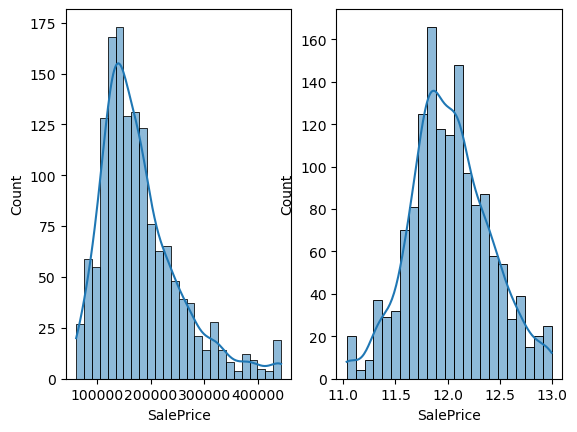

In [327]:
plt.subplot(1,2,1)
sns.histplot(df['SalePrice'],kde=True)
plt.subplot(1,2,2)
sns.histplot(np.log(df['SalePrice']),kde=True)
plt.show()

In [328]:
x = df_dum.drop(['Neighborhood', 'Exterior1st',
                 'Exterior2nd','SalePrice'],axis=1)
y = np.log(df_dum['SalePrice'])
print(x.shape)
print(y.shape)

(1459, 156)
(1459,)


#### Split data into train and test

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                random_state=37)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1021, 156) (438, 156)
(1021,) (438,)


In [331]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

In [332]:
def eval_model(ypred):
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,ypred)
    print('MAE',mae,'MSE',mse,'RMSE',rmse,'R2_Score',r2)

#### LinReg before PCA

In [333]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [334]:
ypred_lr1 = lr1.predict(x_test)
eval_model(ypred_lr1)

MAE 0.09223941329149213 MSE 0.016486860852422583 RMSE 0.128401171538357 R2_Score 0.8760209833856025


In [335]:
print('Train_score',lr1.score(x_train,y_train))
print('Test_score',lr1.score(x_test,y_test))

Train_score 0.9261165464666875
Test_score 0.8760209833856025


### PCA

In [336]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [337]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)

(1021, 156)
(438, 156)


In [338]:
pca  = PCA()
pcomps_train =  pca.fit_transform(x_train_sc)
pcomps_test  =  pca.transform(x_test_sc)
print(pcomps_train.shape)
print(pcomps_test.shape)

(1021, 156)
(438, 156)


#### Compute Eigen_value and Eigen_vector

In [339]:
eig_val = pca.explained_variance_
eig_vec = pca.components_

In [340]:
eig_data_df = pd.DataFrame({'EV':eig_val})
eig_data_df['Var_EV'] = (eig_data_df['EV']/eig_data_df['EV'].sum())*100
eig_data_df['CumSum_Var_EV'] = eig_data_df['Var_EV'].cumsum()
eig_data_df.head(10)

,EV,Var_EV,CumSum_Var_EV
0,15.372494,9.844512,9.844512
1,6.998554,4.481858,14.326370
2,6.394027,4.094721,18.421091
3,5.552331,3.555701,21.976792
4,5.028326,3.220129,25.196920
5,4.190826,2.683796,27.880716
6,3.319687,2.125920,30.006637
7,3.065188,1.962940,31.969576
8,2.844885,1.821858,33.791434
9,2.620631,1.678246,35.469681


#### Scree Ptot

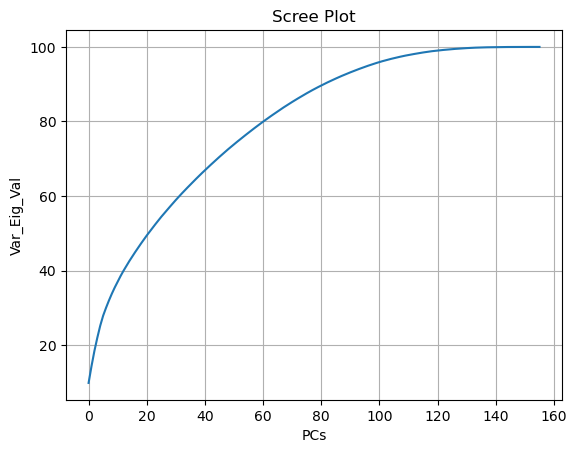

In [341]:
plt.plot(list(range(156)),eig_data_df['CumSum_Var_EV'])
plt.title('Scree Plot')
plt.xlabel('PCs')
plt.ylabel('Var_Eig_Val')
plt.grid()
plt.show()

In [342]:
eig_data_df[eig_data_df['CumSum_Var_EV']>=79]

,EV,Var_EV,CumSum_Var_EV
59,9.157272e-01,5.864297e-01,79.382194
60,8.955003e-01,5.734764e-01,79.955671
61,8.820717e-01,5.648768e-01,80.520547
62,8.647383e-01,5.537765e-01,81.074324
63,8.532390e-01,5.464124e-01,81.620736
...,...,...,...
151,3.031690e-30,1.941488e-30,100.000000
152,6.906397e-32,4.422842e-32,100.000000
153,6.906397e-32,4.422842e-32,100.000000
154,6.906397e-32,4.422842e-32,100.000000


#### Inference
1) Containing 53 PCs, ensures that 75% of variance is retained<br>
2) Containing 62 PCs, ensures that 80% of variance is retained.

In [343]:
pc_list = ['PC'+str(i) for i in range(156)]

In [344]:
pcomps_train_df = pd.DataFrame(pcomps_train,columns=pc_list)
pcomps_test_df = pd.DataFrame(pcomps_test,columns=pc_list)
print(pcomps_train_df.shape)
print(pcomps_test_df.shape)

(1021, 156)
(438, 156)


In [345]:
pcomps_train_df = pcomps_train_df.iloc[:,:62]
pcomps_test_df = pcomps_test_df.iloc[:,:62]
print(pcomps_train_df.shape)
print(pcomps_test_df.shape)

(1021, 62)
(438, 62)


#### Linear Regression after PCA

In [346]:
lr2 = LinearRegression()
lr2.fit(pcomps_train_df,y_train)

LinearRegression()

In [347]:
ypred_lr2 = lr2.predict(pcomps_test_df)
eval_model(ypred_lr2)

MAE 0.10063513742056872 MSE 0.017906097513207327 RMSE 0.1338136671390756 R2_Score 0.8653485110985972


In [348]:
print('Train_score',lr2.score(pcomps_train_df,y_train))
print('Test_score',lr2.score(pcomps_test_df,y_test))

Train_score 0.8795840662268117
Test_score 0.8653485110985972


In [349]:
print('Train_score',lr1.score(x_train,y_train))
print('Test_score',lr1.score(x_test,y_test))

Train_score 0.9261165464666875
Test_score 0.8760209833856025
